<a href="https://colab.research.google.com/github/ImNotDanish05/2025_KC_TI-1A/blob/main/Airbnb%20-%20UTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
!pip install danish05

In [67]:
import numpy as np
import pandas as pd
import danish05
import matplotlib
import matplotlib.pyplot as plt
import os
from google.colab import drive
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
drive.mount("/content/drive/")
dpath = "/content/drive/MyDrive/Danish05/File Belajar/Coding Fun/Data/Kecerdasan Buatan/UTS Semester 2"

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## Load Dataset

In [68]:
airbnb_csv = os.path.join(dpath, 'airbnb.csv')

### Check Data Info

In [69]:
df_airbnb = pd.read_csv(airbnb_csv) # Ini sudah dataframe
df_airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# **Data types**

In [70]:
# Data type
df_airbnb.dtypes

,0
id,int64
name,object
host_id,int64
host_name,object
neighbourhood_group,object
neighbourhood,object
latitude,float64
longitude,float64
room_type,object
price,int64


In [71]:
# Melihat banyak data yang masih ada NULL
df_airbnb.isnull().sum()

,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [72]:
# Mengecek jumlah baris dan data
x, y = df_airbnb.shape
print(f"Jumlah data: {x}")
print(f"Jumlah baris: {y}")

Jumlah data: 48895
Jumlah baris: 16


In [73]:
df_airbnb[['price']].describe().round(2)

,price
count,48895.00
mean,152.72
std,240.15
min,0.00
25%,69.00
50%,106.00
75%,175.00
max,10000.00


In [74]:
# Mengecek kita punya room type apa saja
df_airbnb[['room_type']].groupby(['room_type']).count()

""
room_type
Entire home/apt
Private room
Shared room


In [75]:
result = df_airbnb[['room_type', 'price']].groupby(['room_type']).agg(
    Price_count=('price', 'count'),
    Price_mean=('price', 'mean'),
    Price_std=('price', 'std'),
    Price_min=('price', 'min'),
    Price_25=('price', lambda x: x.quantile(0.25)),
    Price_50=('price', 'median'),
    Price_75=('price', lambda x: x.quantile(0.75)),
    Price_max=('price', 'max'),
).round(2)

result['Perbandingan harga'] = (result['Price_min'] / result['Price_max']).round(2)
result = result.rename(columns={'Price_count': 'Jumlah', 'Price_mean': 'Rata-rata harga', 'Price_min': 'Harga terendah', 'Price_max': 'Harga termahal'})


In [76]:
# Mengecek data mana yang gratis
df_airbnb[df_airbnb['price'] == 0]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
23161,18750597,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,Kimberly,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,2018-01-06,0.05,4,28
25433,20333471,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Anisha,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2019-06-24,2.56,4,127
25634,20523843,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",15787004,Martial Loft,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,2019-05-18,0.71,5,0
25753,20608117,"Sunny, Quiet Room in Greenpoint",1641537,Lauren,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,2017-10-27,0.53,2,0
25778,20624541,Modern apartment in the heart of Williamsburg,10132166,Aymeric,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,2018-01-02,0.15,1,73
25794,20639628,Spacious comfortable master bedroom with nice ...,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,Private room,0,1,93,2019-06-15,4.28,6,176
25795,20639792,Contemporary bedroom in brownstone with nice view,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68279,-73.91170,Private room,0,1,95,2019-06-21,4.37,6,232
25796,20639914,Cozy yet spacious private brownstone bedroom,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,2019-06-23,4.35,6,222
26259,20933849,the best you can find,13709292,Qiuchi,Manhattan,Murray Hill,40.75091,-73.97597,Entire home/apt,0,3,0,NaN,NaN,1,0
26841,21291569,Coliving in Brooklyn! Modern design / Shared room,101970559,Sergii,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,2019-06-22,0.11,6,333


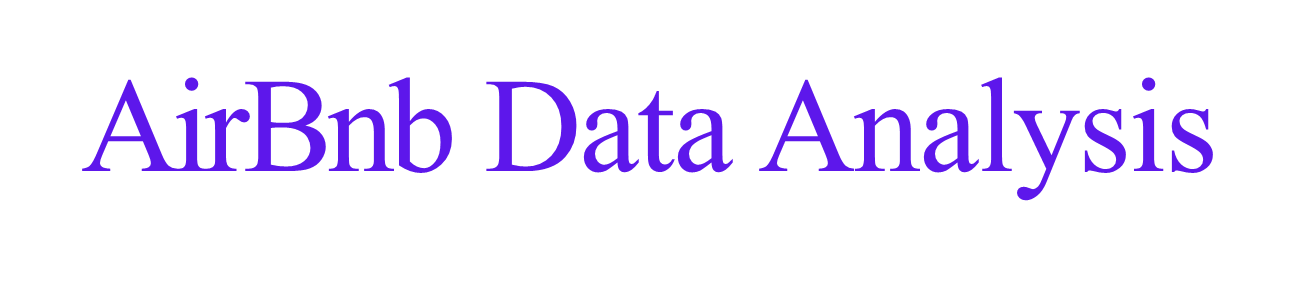

Pada UTS kali ini, kalian akan diminta mempraktekan :

Pandas : Read, Series, DataFrame, Manipulation, Plotting

Matplotlib : Ploting, Customization, Subplot, Diagram, Seaborn

Data Analysis & Manipulation

# 1. Pandas

In [77]:
# 1. Read untuk CSV
df_airbnb = pd.read_csv(airbnb_csv) # Ini sudah dataframe
df_airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [78]:
# 2. Series
# Buat mengecek isi data
se = pd.Series(df_airbnb['room_type'])
se.drop_duplicates()

,room_type
0,Private room
1,Entire home/apt
39,Shared room


In [79]:
# 3. DataFrame
count = df_airbnb['room_type'].value_counts()
checker = pd.DataFrame(
    count
)
checker.columns = ['count']

scaler = MinMaxScaler()
checker['scaled'] = scaler.fit_transform(checker[['count']])
checker.round(2)

,count,scaled
room_type,,
Entire home/apt,25409,1.00
Private room,22326,0.87
Shared room,1160,0.00


In [80]:
# 4. Data Manipulation
# Mengisi data Null dengan yang lain
df_airbnb['reviews_per_month'].fillna(0, inplace=True)
df_airbnb[df_airbnb['name'].isnull()]

<ipython-input-80-f800bc006add>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_airbnb['reviews_per_month'].fillna(0, inplace=True)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2854,1615764,NaN,6676776,Peter,Manhattan,Battery Park City,40.71239,-74.01620,Entire home/apt,400,1000,0,NaN,0.00,1,362
3703,2232600,NaN,11395220,Anna,Manhattan,East Village,40.73215,-73.98821,Entire home/apt,200,1,28,2015-06-08,0.45,1,341
5775,4209595,NaN,20700823,Jesse,Manhattan,Greenwich Village,40.73473,-73.99244,Entire home/apt,225,1,1,2015-01-01,0.02,1,0
5975,4370230,NaN,22686810,Michaël,Manhattan,Nolita,40.72046,-73.99550,Entire home/apt,215,7,5,2016-01-02,0.09,1,0
6269,4581788,NaN,21600904,Lucie,Brooklyn,Williamsburg,40.71370,-73.94378,Private room,150,1,0,NaN,0.00,1,0
6567,4756856,NaN,1832442,Carolina,Brooklyn,Bushwick,40.70046,-73.92825,Private room,70,1,0,NaN,0.00,1,0
6605,4774658,NaN,24625694,Josh,Manhattan,Washington Heights,40.85198,-73.93108,Private room,40,1,0,NaN,0.00,1,0
8841,6782407,NaN,31147528,Huei-Yin,Brooklyn,Williamsburg,40.71354,-73.93882,Private room,45,1,0,NaN,0.00,1,0
11963,9325951,NaN,33377685,Jonathan,Manhattan,Hell's Kitchen,40.76436,-73.98573,Entire home/apt,190,4,1,2016-01-05,0.02,1,0
12824,9787590,NaN,50448556,Miguel,Manhattan,Harlem,40.80316,-73.95189,Entire home/apt,300,5,0,NaN,0.00,5,0


In [81]:
checker2 = df_airbnb.fillna({'name': "Stranger"})
checker2[checker2['name'] == "Stranger"]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2854,1615764,Stranger,6676776,Peter,Manhattan,Battery Park City,40.71239,-74.01620,Entire home/apt,400,1000,0,NaN,0.00,1,362
3703,2232600,Stranger,11395220,Anna,Manhattan,East Village,40.73215,-73.98821,Entire home/apt,200,1,28,2015-06-08,0.45,1,341
5775,4209595,Stranger,20700823,Jesse,Manhattan,Greenwich Village,40.73473,-73.99244,Entire home/apt,225,1,1,2015-01-01,0.02,1,0
5975,4370230,Stranger,22686810,Michaël,Manhattan,Nolita,40.72046,-73.99550,Entire home/apt,215,7,5,2016-01-02,0.09,1,0
6269,4581788,Stranger,21600904,Lucie,Brooklyn,Williamsburg,40.71370,-73.94378,Private room,150,1,0,NaN,0.00,1,0
6567,4756856,Stranger,1832442,Carolina,Brooklyn,Bushwick,40.70046,-73.92825,Private room,70,1,0,NaN,0.00,1,0
6605,4774658,Stranger,24625694,Josh,Manhattan,Washington Heights,40.85198,-73.93108,Private room,40,1,0,NaN,0.00,1,0
8841,6782407,Stranger,31147528,Huei-Yin,Brooklyn,Williamsburg,40.71354,-73.93882,Private room,45,1,0,NaN,0.00,1,0
11963,9325951,Stranger,33377685,Jonathan,Manhattan,Hell's Kitchen,40.76436,-73.98573,Entire home/apt,190,4,1,2016-01-05,0.02,1,0
12824,9787590,Stranger,50448556,Miguel,Manhattan,Harlem,40.80316,-73.95189,Entire home/apt,300,5,0,NaN,0.00,5,0


<ipython-input-82-3763ac439fc6>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=result2,


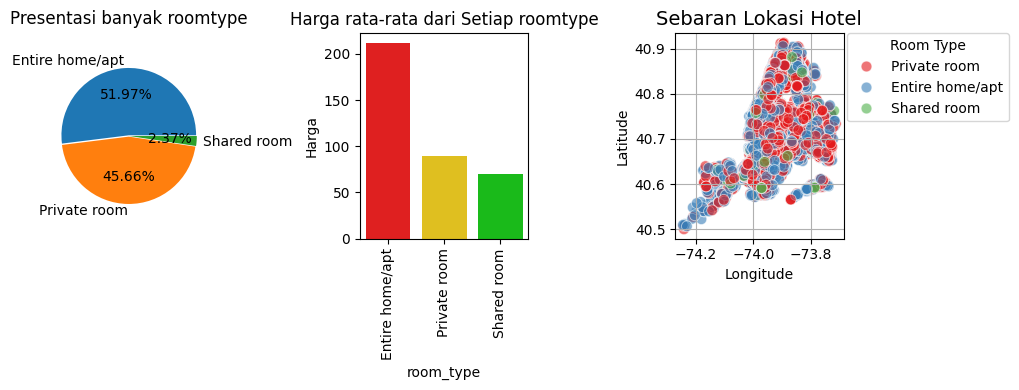

<Figure size 640x480 with 0 Axes>

In [82]:
"""
result = df_airbnb[['room_type', 'price']].groupby(['room_type']).agg(
    Price_count=('price', 'count'),
    Price_mean=('price', 'mean'),
    Price_std=('price', 'std'),
    Price_min=('price', 'min'),
    Price_25=('price', lambda x: x.quantile(0.25)),
    Price_50=('price', 'median'),
    Price_75=('price', lambda x: x.quantile(0.75)),
    Price_max=('price', 'max'),
).round(2)

result.rename(columns={'Price_count': 'Banyak dipakai', 'Price_mean': 'Rata-rata harga', 'Price_min': 'Harga terendah', 'Price_max': 'Harga termahal'})
"""

# 2. Matplotlib : Ploting, Customization, Subplot, Diagram, Seaborn
result2 = result.reset_index()
plt.figure(figsize=(10, 4))

# Grafik 1
plt.subplot(1, 3, 1)
plt.pie(result2['Jumlah'],
        labels=result2['room_type'],
        autopct= '%1.2f%%',
        explode= [0.01, 0.01, 0.01]
        )
plt.title('Presentasi banyak roomtype', pad=20)

# Grafik 2
plt.subplot(1, 3, 2)

x_coords = np.arange(len(result2['Rata-rata harga']))
sns.barplot(data=result2,
            x='room_type',
            y='Rata-rata harga',
            palette=['#FF0000', '#FFD400', '#00D400'])

plt.xticks(rotation=90)
plt.ylabel('Harga')
plt.title('Harga rata-rata dari Setiap roomtype')

# Grafik 3
plt.subplot(1, 3, 3)
sns.scatterplot(
    data=df_airbnb,
    x='longitude',
    y='latitude',
    hue='room_type',
    palette='Set1',
    alpha=0.6,
    s=60
)

plt.legend(
    title='Room Type',
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    borderaxespad=0
)


plt.title('Sebaran Lokasi Hotel', fontsize=14)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()

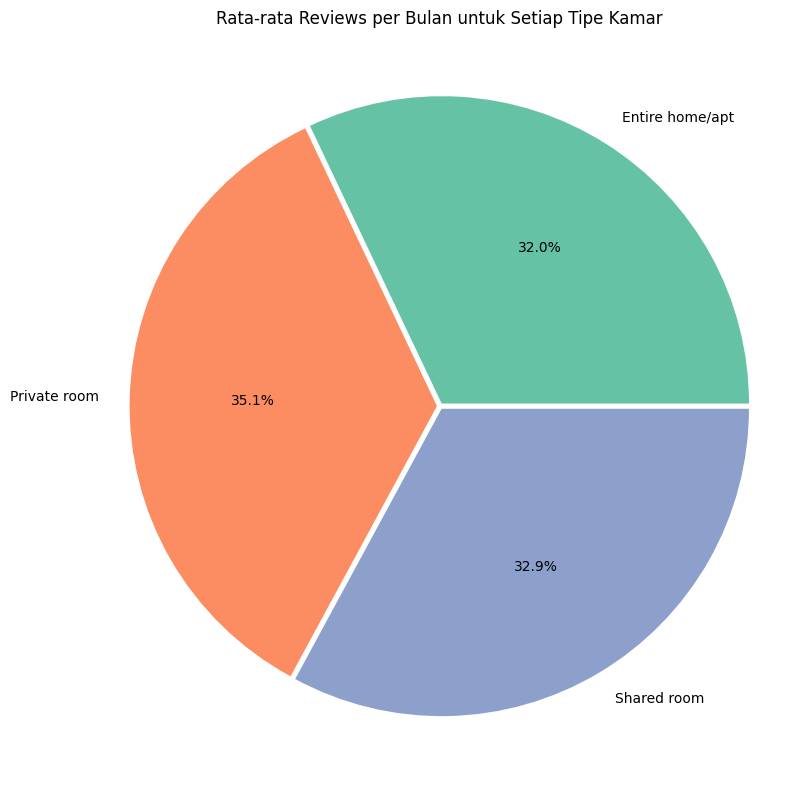

,room_type,reviews_per_month
0,Entire home/apt,1.05
1,Private room,1.14
2,Shared room,1.07


In [83]:
df_selected = df_airbnb[['room_type', 'reviews_per_month']].copy()
average_reviews = df_selected.groupby('room_type', as_index=False)['reviews_per_month'].mean()
plt.figure(figsize=(8, 8))
plt.pie(average_reviews['reviews_per_month'], labels=average_reviews['room_type'], autopct='%1.1f%%', colors=sns.color_palette('Set2', len(average_reviews)), explode= [0.01, 0.01, 0.01])
plt.title('Rata-rata Reviews per Bulan untuk Setiap Tipe Kamar')
plt.axis('equal')
plt.tight_layout()
plt.show()

average_reviews.round(2)

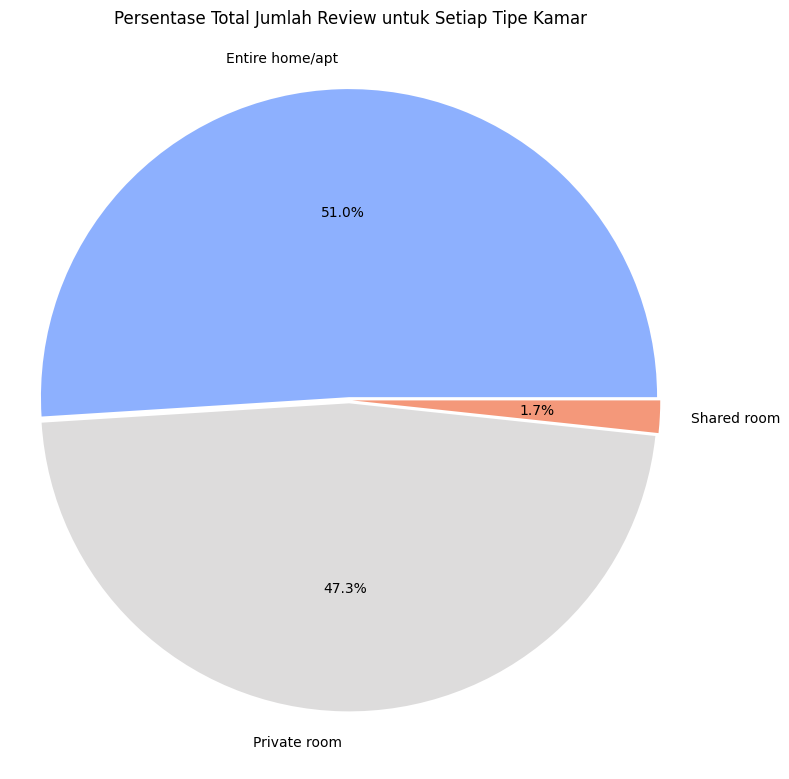

In [84]:
df_selected = df_airbnb[['room_type', 'number_of_reviews']].copy()
total_reviews = df_selected.groupby('room_type', as_index=False)['number_of_reviews'].sum()

plt.figure(figsize=(8, 8))
plt.pie(total_reviews['number_of_reviews'], labels=total_reviews['room_type'], autopct='%1.1f%%', colors=sns.color_palette('coolwarm', len(total_reviews)), explode= [0.01, 0.01, 0.01])
plt.title('Persentase Total Jumlah Review untuk Setiap Tipe Kamar')
plt.axis('equal')
plt.tight_layout()
plt.show()
